In [16]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/David/Downloads/paises_mundo.csv")

In [4]:
df.head()

,CrecPobl,MortInf,PorcMujeres,PNB95,ProdElec,LinTelf,ConsAgua,PropBosq,PropDefor,ConsEner,EmisCO2
0,1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
1,3.0,124,46,4422,955,6,57,19,0.7,89,0.5
2,4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
3,2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
4,1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5


# Parte 1

1. Calcule las matrices de varianza-covarianza S con cov(X) y la matriz de correlaciones con cor(X)

In [5]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

cov = df_numerico.cov()

cor = df_numerico.corr()

cov, cor

(                 CrecPobl       MortInf    PorcMujeres         PNB95  \
 CrecPobl         1.538298  2.195026e+01      -6.078026 -8.933379e+04   
 MortInf         21.950263  1.032859e+03      -9.249342 -2.269332e+06   
 PorcMujeres     -6.078026 -9.249342e+00      76.983224  2.813114e+05   
 PNB95       -89333.788772 -2.269332e+06  281311.418421  4.999786e+10   
 ProdElec    -49739.635746 -1.043435e+06  226024.813487  2.247791e+10   
 LinTelf       -136.907895 -4.381366e+03     449.975000  2.039550e+07   
 ConsAgua       -48.270921 -1.288211e+03   -1568.313487  1.097481e+07   
 PropBosq        -3.887018 -1.466316e+01      65.178947  2.474311e+05   
 PropDefor        0.336197  1.276296e+01       0.268059 -5.806203e+04   
 ConsEner      -838.416886 -4.442568e+04     285.520724  1.415628e+08   
 EmisCO2         -1.137877 -9.485500e+01      -2.150132  2.501673e+05   
 
                  ProdElec       LinTelf      ConsAgua       PropBosq  \
 CrecPobl    -4.973964e+04 -1.369079e+02 -4.82709

2. Calcule los valores y vectores propios de cada matriz.La función en R es: eigen().

In [6]:
eigen_cov_valores, eigen_cov_vectores = np.linalg.eig(cov)

eigen_cor_valores, eigen_cor_vectores = np.linalg.eig(cor)

eigen_cov_valores, eigen_cov_vectores, eigen_cor_valores, eigen_cor_vectores

(array([6.16357629e+10, 6.58161227e+09, 4.63625593e+06, 3.10723182e+05,
        1.21601494e+04, 5.13776704e+02, 3.62788506e+02, 4.54208135e+01,
        5.80086834e+00, 4.76808277e-01, 1.43801991e+00]),
 array([[-1.65816773e-06,  4.70678460e-07, -1.26373574e-04,
         -1.92840781e-05,  5.53739707e-03,  1.24345612e-02,
         -5.35908938e-03, -8.39081045e-02, -6.77835776e-02,
         -9.87288738e-01, -1.15809094e-01],
        [-4.04813855e-05, -1.77425442e-05, -8.22538212e-03,
         -2.49325727e-03,  9.44030203e-02,  9.91751509e-01,
         -2.25801959e-02, -7.89112785e-02, -1.63783592e-02,
          2.09249092e-02,  4.26487142e-04],
        [ 5.73909610e-06, -1.08454281e-05, -1.31814909e-04,
          5.53830717e-03, -3.14036410e-02,  8.55299154e-02,
          1.13648080e-01,  9.85649803e-01, -1.46846382e-02,
         -8.34432428e-02,  8.24146556e-03],
        [ 8.88037597e-01,  4.59763191e-01, -2.60220711e-03,
         -3.89358789e-04,  3.32740919e-04, -8.62100480e-06,
      

3. Calcule la proporción de varianza explicada por cada componente. Se sugiere dividir cada lambda entre la varianza total (las lambdas están en eigen(S)[1]). La varianza total es la suma de las varianzas de la diagonal de S. Una forma es sum(diag(S)).  La varianza total de los componentes es la suma de los valores propios (es decir, la suma de la varianza de cada componente), sin embargo, si sumas la diagonal de S (es decir, la varianza de cada x), te da el mismo valor (¡comprúebalo!). Recuerda que las combinaciones lineales buscan reproducir la varianza de X.

In [7]:
total_varianza_cov = cov.values.diagonal().sum()

varianza_explicada = eigen_cov_valores / total_varianza_cov

sum_eigen_cov = eigen_cov_valores.sum()

varianza_explicada, sum_eigen_cov, total_varianza_cov

(array([9.03454311e-01, 9.64729842e-02, 6.79580362e-05, 4.55456679e-06,
        1.78242937e-07, 7.53091641e-09, 5.31773802e-09, 6.65776294e-10,
        8.50288738e-11, 6.98903483e-12, 2.10784328e-11]),
 68222335252.701385,
 68222335252.70136)

In [8]:
varianza_explicada[0:2].sum()

0.9999272955265136

La proporcion de la varianza explicada por cada componente se muestra en el primer arreglo, que nos dice que los 2 primeros componentes explican el 99.99% de la varianza.

tembien estamos mostrando que la suma de los valores propios es igual a la suma de la diagonal de S.

4. Acumule los resultados anteriores. (cumsum() puede servirle).

In [9]:
varianza_explicada_comulativa = np.cumsum(varianza_explicada)

varianza_explicada_comulativa

array([0.90345431, 0.9999273 , 0.99999525, 0.99999981, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Como ya lo vimos en el punto anterior aqui tenemos la varianza acumulada donde podemos ver que en solo 2 componentes se explica practicamente toda la varianza.

5. Según los resultados anteriores, ¿qué componentes son los más importantes? ¿qué variables son las que más contribuyen a la primera y segunda componentes principales? ¿por qué lo dice? ¿influyen las unidades de las variables?

In [10]:
componente_1_cov_vars = eigen_cov_vectores[:, 0]
componente_2_cov_vars = eigen_cov_vectores[:, 1]

componente_1_cov_indices = np.argsort(np.abs(componente_1_cov_vars))[::-1]
componente_2_cov_indices = np.argsort(np.abs(componente_2_cov_vars))[::-1]

componente_1_vars_importantes = df_numerico.columns[componente_1_cov_indices]
componente_2_vars_importantes = df_numerico.columns[componente_2_cov_indices]

ya que vimos que los primeros 2 componentes explican casi toda la varianza vamos a analisar que variables son importantes para estos componentes:

In [11]:
componente_1_vars_importantes

Index(['PNB95', 'ProdElec', 'ConsEner', 'LinTelf', 'ConsAgua', 'MortInf',
       'PorcMujeres', 'EmisCO2', 'PropBosq', 'CrecPobl', 'PropDefor'],
      dtype='object')

Componente 1:
    - PNB95
    - ProdElec
    - ConsEner
    - LinTelf
    - ConsAgua

In [12]:
componente_2_vars_importantes

Index(['ProdElec', 'PNB95', 'ConsAgua', 'ConsEner', 'LinTelf', 'MortInf',
       'PorcMujeres', 'PropBosq', 'EmisCO2', 'CrecPobl', 'PropDefor'],
      dtype='object')

Componente 2: 
    - ProdElec
    - PNB95
    - ConsAgua
    - LinTelf
    - MortInf

6. Hacer los mismos pasos anteriores, pero con la matriz de correlaciones (se obtiene con cor(x) si x está compuesto por variables numéricas)

In [13]:
varianza_explicada_ratio_cor = eigen_cor_valores / sum(eigen_cor_valores)

varianza_explicada_comulativa_cor = np.cumsum(varianza_explicada_ratio_cor)

varianza_explicada_ratio_cor, varianza_explicada_comulativa_cor

(array([0.36635264, 0.17545381, 0.12458283, 0.00630533, 0.01330256,
        0.01527895, 0.02970918, 0.05193683, 0.07859236, 0.0721946 ,
        0.06629091]),
 array([0.36635264, 0.54180645, 0.66638928, 0.67269462, 0.68599718,
        0.70127613, 0.73098531, 0.78292214, 0.8615145 , 0.93370909,
        1.        ]))

Aqui tenemos la varianza explicada por componente utilizando la matriz de correlacion, vemos que es muy distinto a la matriz de covarianza

In [14]:
componente_1_cor_vars_contribuyentes = eigen_cor_vectores[:, 0]
componente_2_cor_vars_contribuyentes = eigen_cor_vectores[:, 1]

componente_1_cor_indices = np.argsort(np.abs(componente_1_cor_vars_contribuyentes))[::-1]
componente_2_cor_indices = np.argsort(np.abs(componente_2_cor_vars_contribuyentes))[::-1]

componente_1_cor_vars_importantes = df_numerico.columns[componente_1_cor_indices]
componente_2_cor_vars_importantes = df_numerico.columns[componente_2_cor_indices]

componente_1_cor_vars_importantes, componente_2_cor_vars_importantes

(Index(['LinTelf', 'ConsEner', 'MortInf', 'EmisCO2', 'CrecPobl', 'PNB95',
        'ProdElec', 'PropDefor', 'PorcMujeres', 'ConsAgua', 'PropBosq'],
       dtype='object'),
 Index(['PorcMujeres', 'PropBosq', 'CrecPobl', 'ConsAgua', 'EmisCO2',
        'ConsEner', 'PNB95', 'ProdElec', 'PropDefor', 'MortInf', 'LinTelf'],
       dtype='object'))

Aqui tenemos las variables que afectan a los 2 primeros componentes:

Componente 1:
    - LinTelf
    - ConsEner
    - MortInf
    - EmisCO2
    - CrecPobl

Componente 2:
    - PorcMujeres
    - ProBosq
    - CrecPobl
    - ConsAgua
    - EmisCO2

7. Compare los resultados de los incisos 6 y 7. ¿qué concluye?

Varianza explicada:
- Matriz de covarianza: las 2 primeras componentes explican casi el 100% de la varianza.
- Matriz de correlaciones: las 3 primers componentes explican aproximadamente el 66.64% de la varianza.

Variables contribuyentes:
- Matriz de covarianza: las variables PNB95, ProdElec, ConsEner, LinTelf y ConsAgua son especialmente influyentes en los 2 primeros componentes.
- Matriz de correlaciones: las variables: LinTelf, ConsEner, MortInf, EmisCO2, CrecPobl y PNB95 son las mas importantes en el primer componente, mientras que PorcMujeres, PropBosq, CrecPobl y ConsAgua lo son del segundo componente.

Sensibilidad a escala de variables:
- Matriz de covarianza: sensible a las escalas de las variables. Las variables con mayor varianza o unidades mas grandes podrian dominar los primeros componentes.
- Matriz de correlaciones: No es sensible a las escalas ya que las variables estan estandarizadas.

Conclusion: Si las variables tienen unidades y escalas muy diferentes, como es el caso de muchos indicadores económicos y sociales, el PCA basado en la matriz de correlaciones puede ser más adecuado, ya que no permite que las variables con grandes magnitudes dominen las componentes principales. Sin embargo, si el objetivo es mantener la estructura original de los datos y no se quiere perder información debido a la estandarización, entonces el PCA basado en la matriz de covarianza podría ser la elección correcta.

# Parte 2

In [15]:
scores_cov = df_numerico.dot(eigen_cov_vectores[:, :2])

scores_cor = df_numerico.dot(eigen_cor_vectores[:, :2])

scores_cov.head(), scores_cor.head()

(               0             1
 0    3748.148614  -2454.860906
 1    4366.215552   1184.993507
 2  160447.555244 -19429.044770
 3   48758.316807   2853.127201
 4  277588.281378  69435.364579,
                0             1
 0   -1809.318461  -1005.905990
 1   -1554.310705   -948.753318
 2  -64998.207474 -38205.543028
 3  -18727.212915 -11089.819026
 4 -100116.559662 -60052.701327)

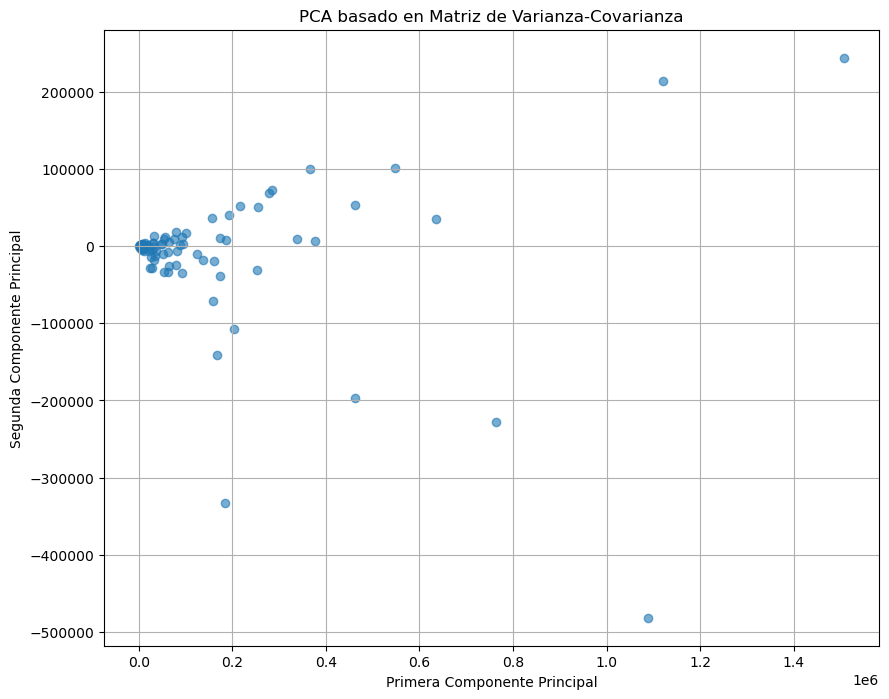

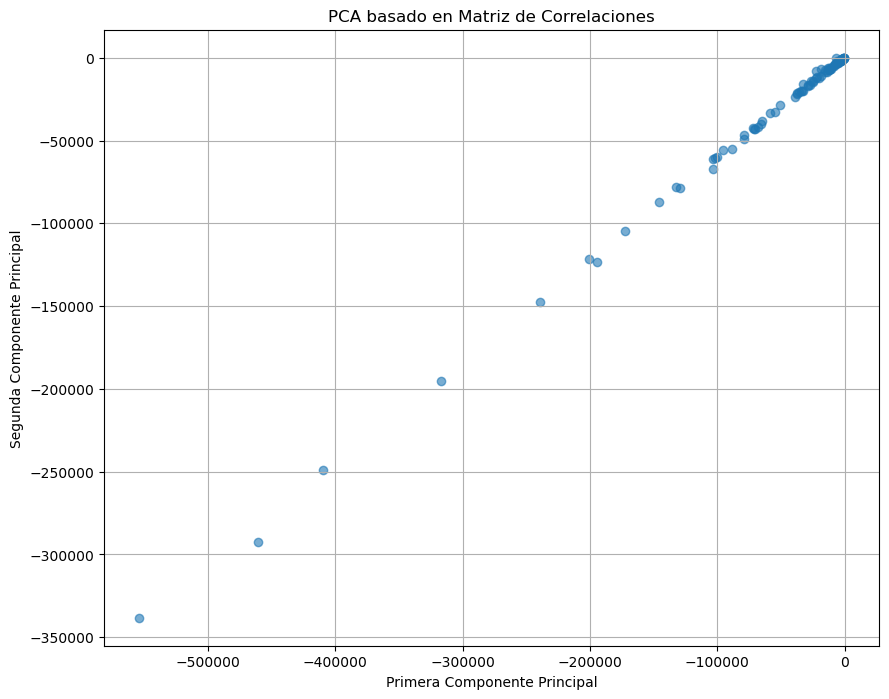

In [17]:
def plot_scores_without_labels(scores, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(scores.iloc[:, 0], scores.iloc[:, 1], alpha=0.6)
    plt.title(title)
    plt.xlabel('Primera Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.grid(True)
    plt.show()

plot_scores_without_labels(scores_cov, "PCA basado en Matriz de Varianza-Covarianza")
plot_scores_without_labels(scores_cor, "PCA basado en Matriz de Correlaciones")

Interpretacion:

1. PCA basado en Matriz de Varianza-Covarianza:
- La mayoría de los puntos se agrupan cerca del origen, pero hay algunos puntos que se alejan significativamente en la dirección de la primera componente principal.
- Estos puntos que se alejan podrían corresponder a países con valores extremadamente altos en algunas variables, posiblemente indicadores económicos.

2. PCA basado en Matriz de Correlaciones:
- La distribución de los puntos es más equilibrada y centrada alrededor del origen.
- Esto es coherente con lo que esperaríamos, ya que el PCA basado en correlaciones estandariza las variables, lo que significa que todas tienen igual importancia en el análisis.

# Parte 3

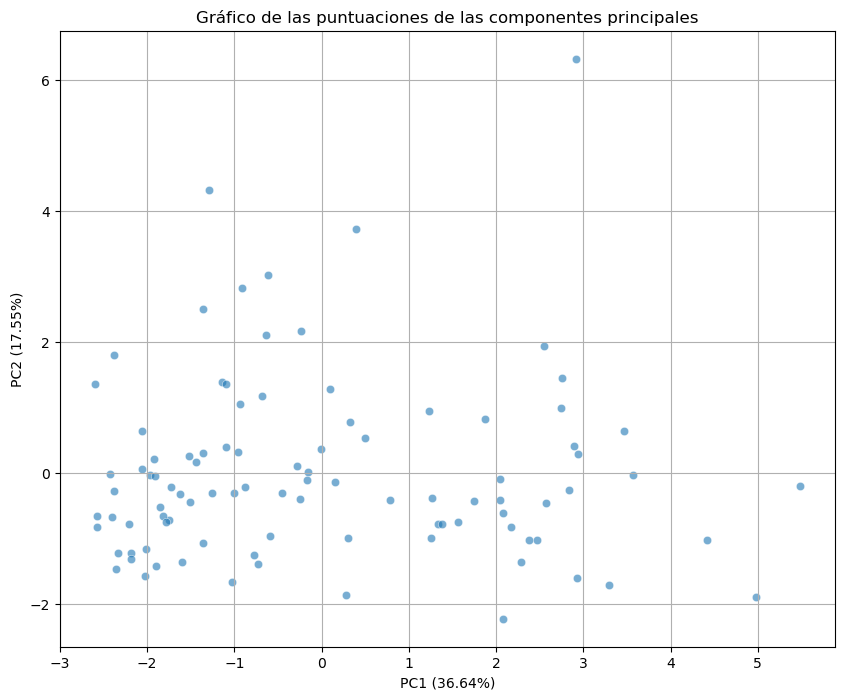

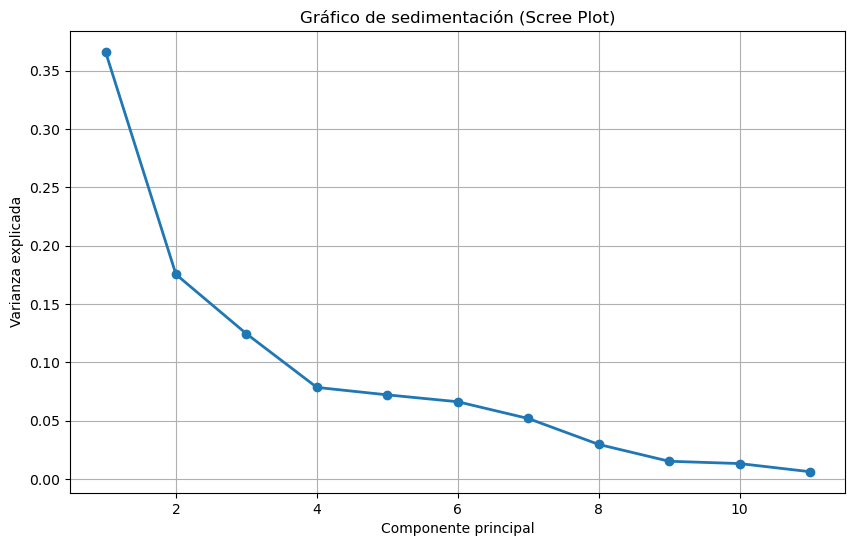

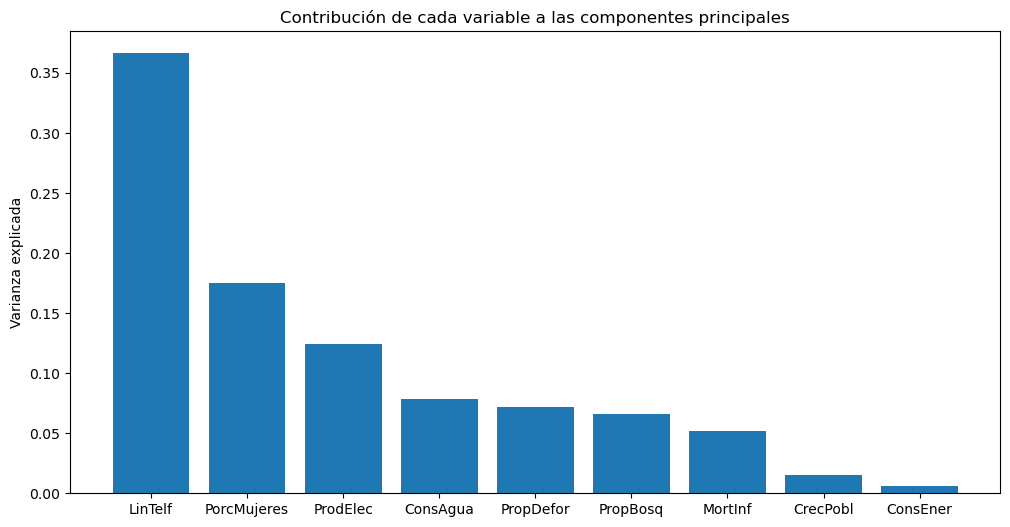

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numerico)

pca = PCA()
principal_components = pca.fit_transform(data_scaled)

def plot_individuals(principal_components, explained_variance_ratio):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], alpha=0.6)
    plt.title("Gráfico de las puntuaciones de las componentes principales")
    plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}%)")
    plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}%)")
    plt.grid(True)
    plt.show()

def scree_plot(pca):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-', linewidth=2)
    plt.title("Gráfico de sedimentación (Scree Plot)")
    plt.xlabel("Componente principal")
    plt.ylabel("Varianza explicada")
    plt.grid(True)
    plt.show()

def variable_contribution(pca, df):
    n_pcs = pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_feature_names = df.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
    
    plt.figure(figsize=(12, 6))
    plt.bar(most_important_names, pca.explained_variance_ratio_)
    plt.title("Contribución de cada variable a las componentes principales")
    plt.ylabel("Varianza explicada")
    plt.show()

plot_individuals(principal_components, pca.explained_variance_ratio_)
scree_plot(pca)
variable_contribution(pca, df_numerico)

1. Gráfico de las puntuaciones de las componentes principales para los individuos:
- Cada punto representa un país en el espacio de las dos primeras componentes principales.
- Las etiquetas en los ejes x e y indican la proporción de varianza explicada por cada componente principal.

2. Gráfico de sedimentación (Scree Plot):
- Muestra la proporción de varianza explicada por cada componente principal.
- Es útil para determinar cuántas componentes deberías considerar en tu análisis.

3. Contribución de cada variable a las componentes principales:
- Muestra qué variable tiene la mayor contribución (en términos absolutos) a cada componente principal.
- Las barras representan la varianza explicada por cada componente principal, y las etiquetas en el eje x indican qué variable contribuye más a esa componente.